# Using a Webcam as input source of the Composable Pipeline
----

<div class="alert alert-box alert-info">
Please use Jupyter labs http://&lt;board_ip_address&gt;/lab for this notebook.
</div>

This notebook shows your how to use a Webcam as a input source for your composable pipeline

## Aims
* Use Webcam as an input video source
* Compose a video pipeline over the webcam stream

## Table of Contents
* [Download Composable Overlay](#download)
* [Configure Webcam](#setup_cam)
* [Compose Pipeline](#pipeline)
* [Modify Parameters](#parameters)
* [Stop HDMI Video](#stop_hdmi)
* [Conclusion](#conclusion)

----

## Revision History

* v1.0 | 21 June 2021 | First notebook revision.

----

## Download Composable Overlay <a class="anchor" id="download"></a>

Import the pynq video libraries as well as ComposableOverlay class and the drivers for the IP.

Download the Composable Overlay using the `ComposableOverlay` and grab a handler to the `composable` hierarchy

In [11]:
from pynq.lib.video import *
from composable_pipeline import ComposableOverlay
from composable_pipeline.libs import *
from composable_pipeline.video import *
from ipywidgets import widgets, interact, FloatSlider, IntSlider

ol = ComposableOverlay("../overlay/cv_dfx_4_pr.bit")

cpipe = ol.composable

## Configure Webcam <a class="anchor" id="setup_cam"></a>

Configure the Webcam and grab handlers to the HDMI Out and configure both of them. Finally, start the video path

<div class="alert alert-heading alert-danger">
    <h4 class="alert-heading">Warning:</h4>

Failure to connect HDMI output cable to an screen may cause the notebook to hang
</div>

In [12]:
video_in = Webcam()

hdmi_out = ol.video.hdmi_out
hdmi_out.configure(video_in.mode, PIXEL_BGR)

video_in.start()
hdmi_out.start();
video_in.tie(hdmi_out)

## Compose Pipeline <a class="anchor" id="pipeline"></a>

Grab handlers to the HDMI Out video path

In [13]:
video_out_in = cpipe.video.hdmi_out.pixel_unpack
video_out_out =  cpipe.video.hdmi_out.color_convert

<div class="alert alert-heading alert-danger">
    <h4 class="alert-heading">Warning:</h4>

Failure to pause the Webcam before using `.loadIP` may cause the notebook to hang
</div>

In [14]:
video_in.pause()

In this part of the notebook, we will bring new functionality into the DFX regions to compose a corner detect application. 

Load dynamic IP, grab handlers and set up default values

In [15]:
cpipe.loadIP(['pr_1/cornerHarris_accel', 'pr_fork/duplicate_accel', 'pr_join/add_accel'])

Resume Webcam stream

In [16]:
video_in.tie(hdmi_out)

In [17]:
harris = cpipe.pr_1.cornerHarris_accel
duplicate = cpipe.pr_fork.duplicate_accel
add = cpipe.pr_join.add_accel
r2g = cpipe.video.composable.rgb2gray_accel
g2r = cpipe.video.composable.gray2rgb_accel

Unhandled exception in thread started by <bound method Webcam._tie of <composable_pipeline.video.Webcam object at 0xa56438d0>>


The Corner Detect is realized by adding (masking) the output of the Harris algorithm to the original image. In the Composable Overlay this is achieved by branching the pipeline, which is expressed as a list of a list.

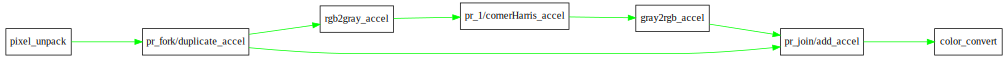

In [8]:
video_pipeline = [video_out_in, duplicate, [[r2g, harris, g2r], [1]], add, video_out_out]

cpipe.compose(video_pipeline)

cpipe.graph

Finally start the video stream from the webcam to the HDMI Out

## Modify Parameters <a class="anchor" id="parameters"></a>
The corner Harris IP provides two parameters that help us tweak the sensitivity of the algorithm. These parameters are the threshold and k (Harris parameter), after running the next cell you will be able to update them.

In [9]:
thr = IntSlider(min=0, max=1024, step=1, value=422)
k = FloatSlider(min=0, max=0.2, step=0.002, value=0.04, description='\u03BA')
def play(thr, k):
    harris.threshold = thr
    harris.k = k

interact(play, thr=thr, k=k);

interactive(children=(IntSlider(value=422, description='thr', max=1024), FloatSlider(value=0.04, description='…

## Stop HDMI Video <a class="anchor" id="stop_hdmi"></a>

Finally stop the video stream

<div class="alert alert-heading alert-danger">
    <h4 class="alert-heading">Warning:</h4>

Failure to stop HDMI Out may hang the board 
when trying to download another bitstream onto the FPGA
</div>

In [10]:
video_in.close()
hdmi_out.close()

----

## Conclusion <a class="anchor" id="conclusion"></a>

This notebook has shown how to compose a video pipeline using a Webcam as a video source

[⬅️ Advanced Features](07_advanced_features.ipynb) | | 

Copyright &copy; 2021 Xilinx, Inc

SPDX-License-Identifier: BSD-3-Clause

----